# Coding Applications in Medicine: V/Q Scans

**[Dependencies](#dependencies)**<br>
**[Set Up](#set-up)**<br>
**[Thresholding](#thresholding)**<br>
**[Binary Operations](#binary)**<br>
**[Create a Mask](#create-a-mask)**<br>
**[Adaptive Thresholding](#adaptive-thresholding)**<br>
**[Next Steps](#next-steps)**<br>

<a id='dependencies'></a>
## Install Dependencies 

In [1]:
# Here we are going to install all of the packages we need for this notebook
!pip install numpy
!pip install matplotlib
!pip install Pillow
!pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 2.1 MB/s eta 0:00:00


<a id='set-up'></a>
## Set Up

In [1]:
# Import the relevant packages
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
from PIL import Image

In [16]:
# Import the images of a normal lung V (ventilation) and Q (perfusion) scan as greyescale
normal_V = cv.imread('VQ_images/pe_V.png', cv.IMREAD_GRAYSCALE)
normal_Q = cv.imread('VQ_images/pe_Q.png', cv.IMREAD_GRAYSCALE)

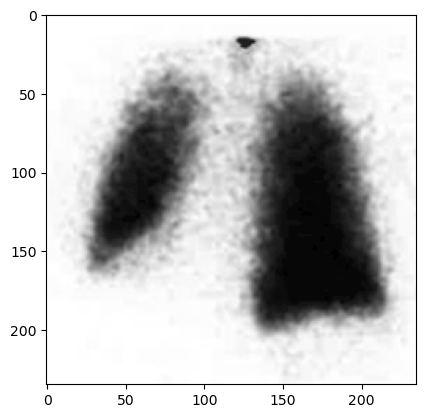

In [17]:
# Let's look at the image that we imported
plt.imshow(normal_V, cmap='gray')

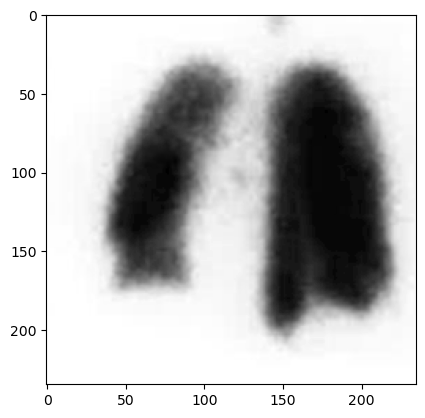

In [18]:
plt.imshow(normal_Q, cmap='gray')

<a id='thresholding'></a>
## Thresholding

Next we're going to threshold the image. Because the image is on the grayscale, the value of each pixel is between 0 and 255. Thresholding sets each pixel of the image to one of the extreme (black or white). Thankfully, the OpenCV package has one for us to use. It takes an image and a threshold value. Then, it sets everything above the threshold value to 255 (white) and everything below the threshold to 0 (black) due to cv.THRESH_BINARY_INV (the type of thresholding the function is using). https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html has more types if you want to explore!

In [19]:
# Play around with the threshold value 0-255 and see what happens
thresh_val = 157

_, normal_V_thresh = cv.threshold(normal_V, thresh_val, 255, cv.THRESH_BINARY_INV)
_, normal_Q_thresh = cv.threshold(normal_Q, thresh_val, 255, cv.THRESH_BINARY_INV)

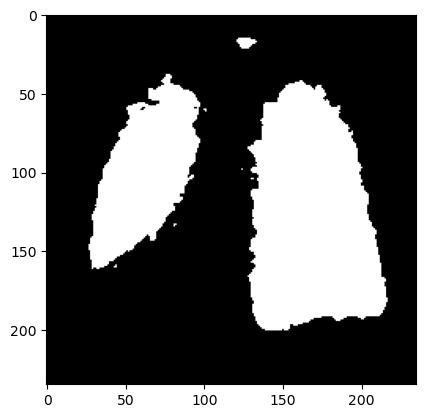

In [20]:
# Let's see the images that it printed out for us! Compare it to the original images
plt.imshow(normal_V_thresh, cmap='gray')

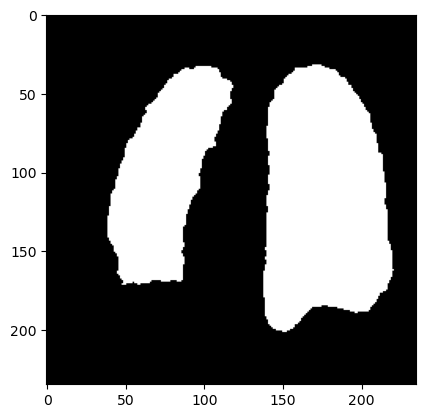

In [21]:
plt.imshow(normal_Q_thresh, cmap='gray')

<a id='binary'></a>
## Binary Operations

While we see the values of the each pixel as 0-255, the computer actually stores each pixel value using a number system called binary numbers. This system represents all numbers as a combination of only 1's and 0's, which are called bits. In our case, white is represented by all 1's (11111111) and black is represented by all 0's (00000000)

We can use this to our advantage with operations on the bits. Normal arithmetic operations like addition and subtraction still work, but now we have unique operations called AND and OR.

0 AND 0 = 0, 0 AND 1 = 0, 1 AND 1 = 1
0 OR 0 = 0, 0 OR 1 = 1, 1 OR 1 = 1

See a pattern?

Try to figure out what the AND is doing on the two thresholded images.

In [22]:
# Perform the AND
VQ_and = cv.bitwise_and(normal_V_thresh, normal_Q_thresh)

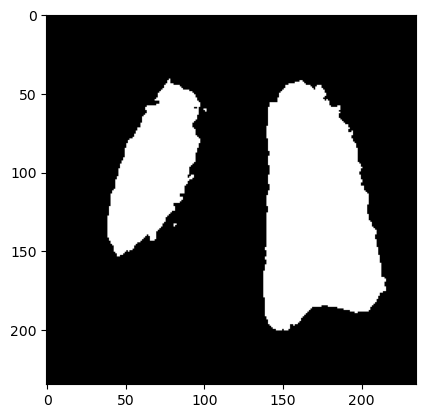

In [23]:
# Let's see what it did
plt.imshow(VQ_and, cmap='gray')

It turns out AND keeps only the white pixels that intersected with one another. If you performed the OR operation, it would be the union of white pixels. In other words, the image would have all the white pixels from both images combined into one.

<a id='create-a-mask'></a>
## Create a mask

Next we're going to look at this thresholded image we made on top of the original images.

In [24]:
# First convert the image to RGB (3 color channels)
V_to_rgb = cv.cvtColor(normal_V, cv.COLOR_GRAY2RGB)
Q_to_rgb = cv.cvtColor(normal_Q, cv.COLOR_GRAY2RGB)

In [25]:
# Create an image that's all black
red_mask = np.zeros((normal_V.shape[0], normal_V.shape[1],3), dtype='uint8')

# and make the Red color channel the same as the thresholded image
red_mask[:,:,0] = VQ_and

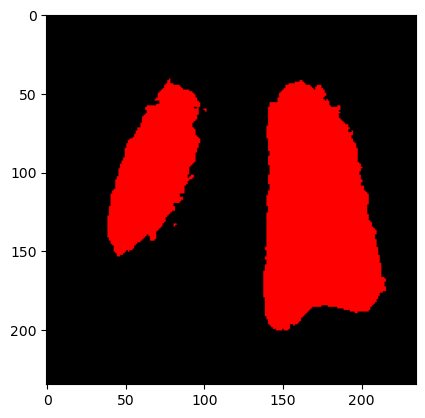

In [26]:
# Now we have a red image!
plt.imshow(red_mask)

In [27]:
# Time to add this red mask on top of the original images. The weight controls how opaque we want the red
# on top of the original image. Play around with this value!
weight = 0.7
combined_V = cv.addWeighted(V_to_rgb, weight, red_mask, 1-weight, 0)
combined_Q = cv.addWeighted(Q_to_rgb, weight, red_mask, 1-weight, 0)

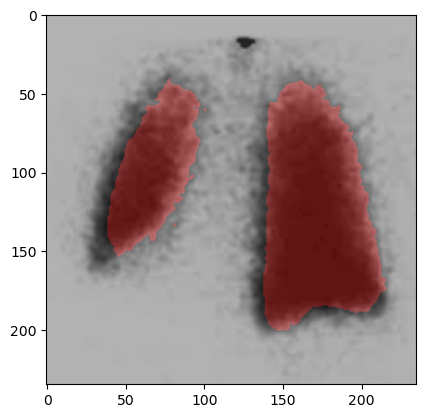

In [28]:
# Show the final image
plt.imshow(combined_V)

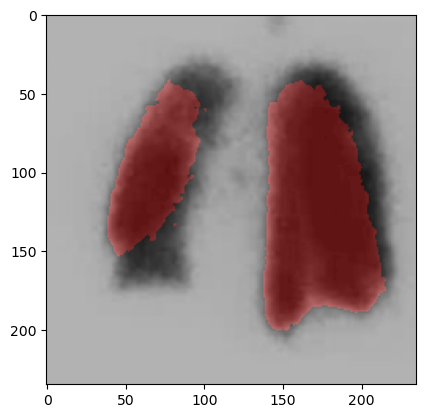

In [29]:
plt.imshow(combined_Q)

<a id='adaptive-thresholding'></a>
## Adaptive Thresholding 

The OpenCV package also has a function called adaptive thresholding. This function instead of setting a hard cutoff for what's black and white, looks at a local area of pixels and calculates the average value. Then, it will decide how to do the thresholding cutoff from there.

In [17]:
# See what happens when you increase or decrease the area in the threshold (odd numbers only)
area = 121
norm_V_adaptThresh = cv.adaptiveThreshold(normal_V, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, area, 0)
norm_Q_adaptThresh = cv.adaptiveThreshold(normal_Q, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, area, 0)

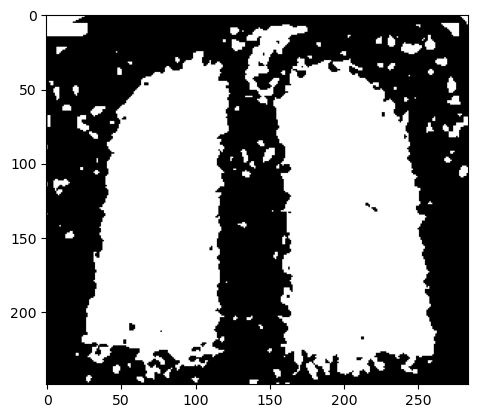

In [18]:
# Look at the image
plt.imshow(norm_V_adaptThresh, cmap='gray')

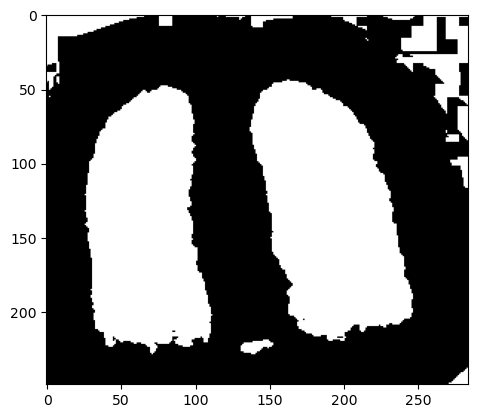

In [19]:
plt.imshow(norm_Q_adaptThresh, cmap='gray')

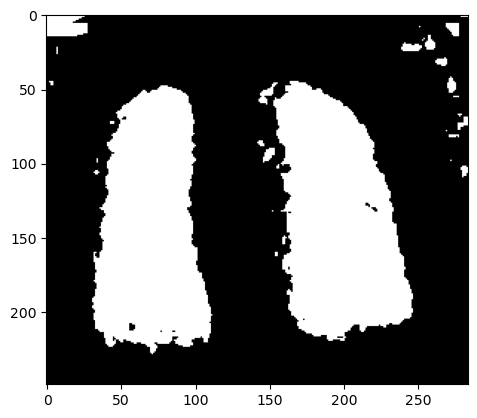

In [20]:
# Let's create that mask again using bitwise AND
adapt_VQ = cv.bitwise_and(norm_V_adaptThresh, norm_Q_adaptThresh)
plt.imshow(adapt_VQ, cmap='gray')

<a id='next-steps'></a>
## Next Steps

## Now that we did that for a normal lung, you can try to do the same procedure for a lung with COPD and a lung with a pulmonary embolism. Change the image imported at the top and run it again and try to look at the similarities and differences! You can also mess around with the thresholding values to see if you can create a better mask. Furthermore, try creating a red (or green or blue or any color of your choosing) mask using the adaptive thresholding image and put it on top of the original.

## The names of the images are: copd_Q.png, copd_V.png, pe_Q.png, pe_V.png